In [1]:
# Write you library imports here. E.g.:
# ...
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Instructions:

1. it is considered proper programming practice to load all the libraries you need in the first cell of a notebook or at the top of the R-Markdown file. Put all your imports (e.g., `library(ggplot)`) in the cell above.
2. Create as many cells as needed to answer a question
  * Group code that is logically related in the same cell
  * Keep cells relatively small
  * Format long statements or expressions, including `ggplot`, across multiple lines
3. Submit your work to GitHub under your MBIO repository.
  * Folder should be called `4_apply_and_data`
    

### Q1

* Write a function called `sd_x` that computes the standard deviation from first principles. Recall that the standard deviation is computed as

$$
\sigma = \sqrt{\frac{\sum{(x_i - \mu)^2}}{N-1}}
$$

* $\mu$ is simply the mean of the vector of inputs
  * it can be computed using the `mean` function


For example, given:

```x = c(1,2,3)```

Since $\mu = 2$, then $\sigma = \sqrt{\frac{(1-2)^2 + (2-2)^2 + (3-2)^2}{3}} = 1$.


In [2]:
# Write your code here
#variables
xi <- c(1,2,3)
mu <- mean(xi)
xi-mu

[1] -1  0  1

In [3]:
sd_x<-sqrt(sum((xi-mu)^2)/2)
sd_x

[1] 1

### Q2
Given the following matrix of data where each column consists of a variable: 
1. Convert this data frame into a tibble called data_tbl
2. Use one of the apply-type of functions in conjunction with `sd_x` you wrote previously to compute the standard deviation for each column.


In [4]:
data = matrix(1:50, ncol=5)
colnames(data) = c("variable_1", "variable_2", "variable_3", "variable_4", "variable_5")
df <-data

In [5]:
# Write your code here
data_tbl<-as_tibble(df)

In [6]:
mu <- apply(data_tbl, 2, mean)

In [7]:
sd_x<-sqrt(sum((data_tbl-mu)^2)/2)

In [8]:
apply(data_tbl, 2, sd_x)

ERROR: Error in get(as.character(FUN), mode = "function", envir = envir): object 'sd_x' of mode 'function' was not found


### Q3

* In this question, we will build a simulated dataset for healthy and diseased corals.  You will be creating a `tibble` called `coral_health_tbl` that contains 2 columns:

1. A column called `coral`. Generate this column by sampling 100 coral species from the following values
```
coral_pop = c("Montipora capitata",
  "Porites compressa",
  "Porites lobata")
```
 * You can use the function `sample` to select 100 values from the vector `coral_pop`
   * You can see how the function sample works [here](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sample)
 
2. The second column is called `is_diseased`.
    * it represents 100 randomly selected `TRUE` or `FALSE` values that represent whether the coral is healthy or diseased.
    * Healthy corals (`is_diseased == FALSE`; not diseased) occur with a probability of 0.8, i.e. (`is_diseased == TRUE`) occurs with a probability of 0.2


In [9]:
# Write your code here
#dataframe variables
coral_pop <- c ("Montipora capitata","Porites compressa","Porites lobata")
diseased <- c("TRUE","FALSE")
coral <- sample(coral_pop, 100, replace = TRUE, prob = NULL)
is_diseased <- sample (diseased, 100, replace = TRUE, prob = c(0.8,0.2))

In [10]:
#make dataframe
coral_health_df <- data.frame (coral, is_diseased)
str(coral_health_df)

'data.frame':	100 obs. of  2 variables:
 $ coral      : chr  "Porites lobata" "Porites lobata" "Porites compressa" "Porites compressa" ...
 $ is_diseased: chr  "FALSE" "TRUE" "TRUE" "TRUE" ...


In [11]:
#make tibble
coral_health_tbl <- as_tibble(coral_health_df)
str(coral_health_tbl)

tibble [100 × 2] (S3: tbl_df/tbl/data.frame)
 $ coral      : chr [1:100] "Porites lobata" "Porites lobata" "Porites compressa" "Porites compressa" ...
 $ is_diseased: chr [1:100] "FALSE" "TRUE" "TRUE" "TRUE" ...


### Q4

* The function `rnorm` is used to sample (i.e., produce) random values from a normal distribution. The syntax of the function is as follows:
```
rnorm(n, mu, sd)
```
where n is the number of samples to generate, mu is the mean of the distribution and `sd` is the standard deviation.

Essentially what the function does is generate `n` random values from a normal distribution that is centered around the mean `mu` and has the standard deviation defined by the parameter `sd`. If you do not understand what this statement means, you should not worry as we will cover it in greater detail in the next section. However, you must know that this function generates n random values that are in some way close to the provided mean (`mu`) you provided.

Use the cell below to experiment with the function `rnorm`. E.g.: try to generate 5 values from the distribution with a mean 10 and a standard deviation 1.

In [12]:
rnorm (5, 10, 1)

[1]  9.208354 10.597121 10.287432 10.824921  8.829212

In [13]:
rnorm (5, 10, 1)

[1] 11.267738  9.487505 10.788501  8.718483 11.225373

In [14]:
set.seed(5)
rnorm (5, 10, 1)

[1]  9.159145 11.384359  8.744508 10.070143 11.711441

In [15]:
set.seed(5)
rnorm (5, 10, 1)

[1]  9.159145 11.384359  8.744508 10.070143 11.711441

### Q5
* Create a new column in `coral_health_tbl` called `coral_cover`. This column represents coral cover values for the corals observed in your tibble
* For the healthy coral (`is_diseased == FALSE`), sample the cover values from a normal with a mean of 9 and standard deviation of 2
* For the diseased corals (`health_status = TRUE`), sample the cover values from a normal with mean 1 and std of 3
* Note that this is a perfect scenario for using `mapply`


In [20]:
coral_health_tbl["coral_cover"]

coral_cover
<dbl>
7.7941840
5.4038857
3.1202833
3.4570268
0.1195545
5.2557672
5.4963215
-0.9712463
-1.5583863


In [21]:
# Write your code here
head(coral_health_tbl)

coral,is_diseased,coral_cover
<chr>,<chr>,<dbl>
Porites lobata,FALSE,7.7941840
Porites lobata,TRUE,5.4038857
Porites compressa,TRUE,3.1202833
Porites compressa,TRUE,3.4570268
Porites lobata,TRUE,0.1195545
Porites lobata,TRUE,5.2557672


In [22]:
diseased_lines <- coral_health_tbl["is_diseased"]==TRUE
dim(subset(coral_health_tbl, diseased_lines))

[1] 84  3

In [23]:
not_diseased_lines <- coral_health_tbl["is_diseased"]==FALSE
dim(subset(coral_health_tbl, not_diseased_lines))

[1] 16  3

In [25]:
values_not_diseased <- rnorm(16, 9, 2)
values_diseased <- rnorm(84, 1, 3)
coral_health_tbl$coral_cover[coral_health_tbl$is_diseased == FALSE] <- values_not_diseased
coral_health_tbl$coral_cover[coral_health_tbl$is_diseased == TRUE] <- values_diseased

In [26]:
head(coral_health_tbl)

coral,is_diseased,coral_cover
<chr>,<chr>,<dbl>
Porites lobata,FALSE,9.8215633
Porites lobata,TRUE,0.9001024
Porites compressa,TRUE,7.0755910
Porites compressa,TRUE,-0.1123602
Porites lobata,TRUE,-3.7347033
Porites lobata,TRUE,0.6352841


### Q6

* Add another column called `binary_health_status`.
 * set the column to 0 if `is_diseased == FALSE`
 * set the column to 1 if `is_diseased == TRUE`

* A trick here is to remember that:
  1. Corecing (converting) a logical can be done with `as.integer()`
  2. `as.integer(TRUE)` returns 1
  3. `as.integer(FALSE)` returns 0




In [27]:
binary_health_status <- 1:100

In [28]:
coral_health_tbl["binary_health_status"] <- binary_health_status

In [29]:
coral_health_tbl$binary_health_status[coral_health_tbl$is_diseased == FALSE] <- 0
coral_health_tbl$binary_health_status[coral_health_tbl$is_diseased == TRUE] <- 1

In [30]:
head(coral_health_tbl)

coral,is_diseased,coral_cover,binary_health_status
<chr>,<chr>,<dbl>,<dbl>
Porites lobata,FALSE,9.8215633,0
Porites lobata,TRUE,0.9001024,1
Porites compressa,TRUE,7.0755910,1
Porites compressa,TRUE,-0.1123602,1
Porites lobata,TRUE,-3.7347033,1
Porites lobata,TRUE,0.6352841,1


In [33]:
coral_health_df2 <- as.data.frame(coral_health_tbl)
str(coral_health_df2)

'data.frame':	100 obs. of  4 variables:
 $ coral               : chr  "Porites lobata" "Porites lobata" "Porites compressa" "Porites compressa" ...
 $ is_diseased         : chr  "FALSE" "TRUE" "TRUE" "TRUE" ...
 $ coral_cover         : num  9.822 0.9 7.076 -0.112 -3.735 ...
 $ binary_health_status: num  0 1 1 1 1 1 1 1 1 1 ...


In [34]:
head(coral_health_df2)

,coral,is_diseased,coral_cover,binary_health_status
,<chr>,<chr>,<dbl>,<dbl>
1,Porites lobata,FALSE,9.8215633,0
2,Porites lobata,TRUE,0.9001024,1
3,Porites compressa,TRUE,7.0755910,1
4,Porites compressa,TRUE,-0.1123602,1
5,Porites lobata,TRUE,-3.7347033,1
6,Porites lobata,TRUE,0.6352841,1


### Q7

* Plot the distribution of `coral_cover` for healthy versus diseased corals
* Note that I am using the histogram `geom`
  * Histograms need only an `x`-axis because the `y` is typically computed as the number of items occurring in a bin of some predetermined width.
    * However, instead of a raw count, we want a normalized count. You can normalize the count by setting `y = stat(count / sum(count))`  
  * I am coloring the bin outlines in black and filling in grey for disease and white for healthy
  * I am using `binwidth=1'.
* Use the `labs` function to add a title and to change the labels for the `x` and `y` axes
* The plot should look "somewhat" like the following
![](https://www.dropbox.com/s/wdbdj05rd50vb0k/healthy-diseased.png?dl=1)

In [49]:
color <- c(rep("white",FALSE),rep("grey",TRUE))

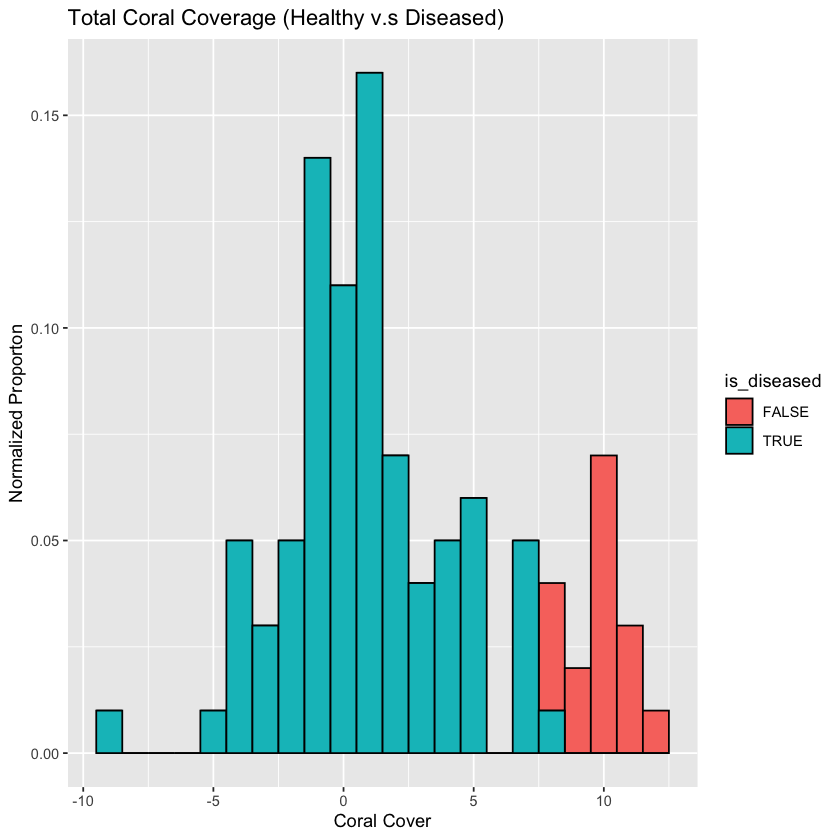

In [65]:
ggplot (coral_health_tbl, aes (x = coral_cover, y = stat(count/sum(count)), fill = is_diseased)) +
geom_histogram (binwidth = 1, color = 'black') +
labs (x = 'Coral Cover', y = 'Normalized Proporton', title = 'Total Coral Coverage (Healthy v.s Diseased)')

### Q8

* Use `geom_density` to mirror the information conveyed in the histogram above using density curves instead of histograms.
  * Set the `adjust` parameter of `geom_density` to `2`
* Change the `xlim` scale so that we can see the edges of the curves
  * I.e., curves should not be cut off
  
* The resulting curve will look like the following
![](https://www.dropbox.com/s/rs4rx0w6ur8p5wq/coral_distr_practical.png?dl=1)


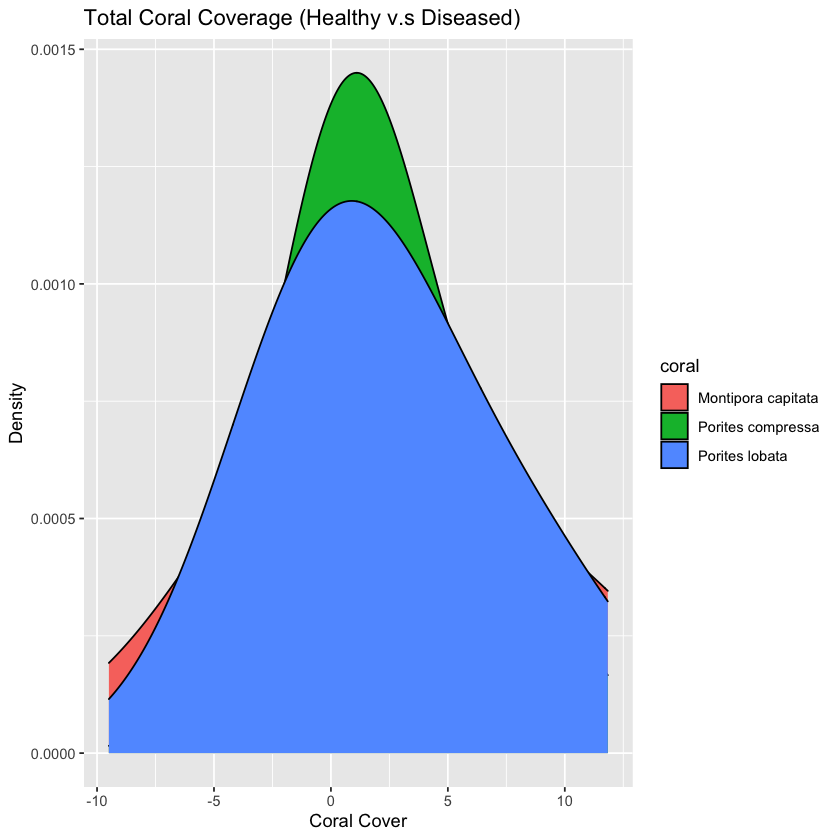

In [67]:
ggplot (coral_health_tbl, aes (x = coral_cover, y = stat(count/sum(count)), fill = coral)) +
geom_density (adjust = 2) +
labs (x = 'Coral Cover', y = 'Density', title = 'Total Coral Coverage (Healthy v.s Diseased)')

### Q9

You have been provided with the dataset illustrated in the image below, which contains counts for 20 fish species across 5 locations. For convenience, only two species and 2 locations are illustrated here. Based on your knowledge of tidy data, how can you format the data shown in this file in a way that is considered `tidy`. Provide an image of a hand-drawn table (or tables if needed) that represents the table format. Briefly justify your answer in a 3-4 sentences.


![](https://www.dropbox.com/s/ucvj0gburg8at60/tidy_data.png?dl=1)

Tidy data has a specific structure: each variable has its own column and each observation has its own row. Here, location is just another variable, so it is given its own column. Genus name and species name (shown in table as "Genus" and "Species") are also treated as separate vaiables, as well as common name ("Common") and count ("Count").
![](https://www.dropbox.com/home/Honour%20Booth?preview=Practical5_Q9+copy.png?dl=1)

### Q10 -- Challenge (Optional)


Recall problem `8` in the airquality dataset.
  * Remember that you can import that dataset using `data(airquality)`
1. Convert the `airquality` dataframe to a tibble called `airq_tbl`
2. Replace the missing values for Solar.R using that month's average.
    * Example:
        * The missing value for line 6 in `airq_tbl`should be replaced with the average for month 5.
        * The missing value for line 97 in `airq_tbl` should be replaced with the average for month 8.

* Strategy:
  1. Compute the average values for months 5, 6, 7, 8, and 9 in a names vector called `monthly_avg_SolarR`
      * monthly_avg_SolarR[5] should return the average for May.
      * monthly_avg_SolarR[6] should return the average for June.
      * etc.
      * This is an ideal use case for `tapply` with `na.rm=TRUE` (ask me!)
  2. for each line of airq_tbl check value of Solar.R and do:
    * if value is not `na`, return the value
    * if value if `na`; return avg associated with `Month`
    * This is an ideal case for `apply`
      * You need to write your own function (call it `fix_missing_solar_R`)
      * Recall that the argument to that function is a complete row as a vector!
    * test your function with the following line to make sure it's working
    ```fix_missing_solar_R(airq_tbl[5,])```